In [5]:
#-- Load all section vertices --#
# Run the code previously written
%run "../baker_cs34_functions.py"
numGridLines = 25                   # How many gridlines we'll use for the visualization

#- Rip the boundary coordinates from the .yaml file -#
fn = "../../startup-files/iea37-boundary-cs4.yaml"
[coordList3a, coordList3b, coordList4a, coordList4b, coordList4c] = getTurbAtrbtCs4YAML(fn)
#- Load the turbine and windrose atributes -#
fname_turb = "../../startup-files/iea37-10mw.yaml"
fname_wr = "../../startup-files/iea37-windrose-cs3.yaml"
wind_dir, wind_dir_freq, wind_speeds, wind_speed_probs, num_speed_bins, min_speed, max_speed = iea37aepC.getWindRoseYAML(fname_wr)
turb_ci, turb_co, rated_ws, rated_pwr, turb_diam = iea37aepC.getTurbAtrbtYAML(fname_turb)
fAEPscale = 1.0
fTCscale = 1.0
fMinDist = 2*turb_diam
numGridLines = 20

#print(coordList3a)
#print(coordList3b)
clsdBP3a = closeBndryList(coordList3a)    # Duplicate the first coordinate for a closed boundary
coordList3b = np.roll(coordList3b, 1)     # Shift our points to the right so rightmost vertex is zero
clsdBP3b = closeBndryList(coordList3b)    # Duplicate the first coordinate for a closed boundary
coordList4a = np.roll(coordList4a, -3)    # Shift our points to the left so rightmost vertex is zero
clsdBP4a = closeBndryList(coordList4a)    # Duplicate the first coordinate for a closed boundary
clsdBP4b = closeBndryList(coordList4b)    # Duplicate the first coordinate for a closed boundary
clsdBP4c = closeBndryList(coordList4c)    # Duplicate the first coordinate for a closed boundary

In [8]:
Args = dict([('wind_dir_freq', wind_dir_freq), \
                ('wind_speeds', wind_speeds), \
                ('wind_speed_probs', wind_speed_probs), \
                ('wind_dir', wind_dir), \
                ('turb_diam', turb_diam), \
                ('turb_ci', turb_ci), \
                ('turb_co', turb_co), \
                ('rated_ws', rated_ws), \
                ('rated_pwr', rated_pwr), \
                ('fAEPscale', fAEPscale), \
                ('fTCscale', fTCscale),
                ('fMinTurbDist', fMinDist)])

In [14]:
#-- Load initial
x0l = []                        # Initialize our turbine <coord> list
for i in range(5):    # Loop through our regions
    PreStarts = np.loadtxt('../results/randostarts-' + cs34Regions().getRegionName(i) + '-200.csv', delimiter=',')
    x0l.extend(makeArrayCoord(PreStarts[4]))
x0  = makeCoordListArray(x0l)
x0s = makeArrayCoord(x0)
coordsCs4 = x0s

2696934.388045312


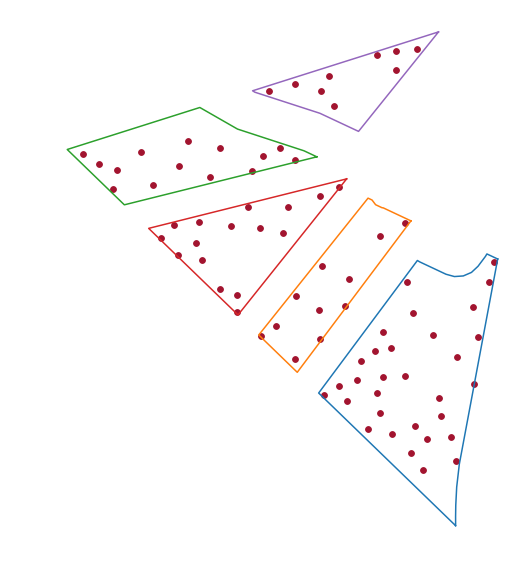

In [15]:
#tempTurbsCs4 = np.loadtxt('../results/turblocs-bpm-3run-cs4-(0).csv', delimiter=',')
#coordsCs4 = makeArrayCoord(tempTurbsCs4[0])

#tempTurbsCs4 = np.loadtxt('../results/turblocs-bpm-3run-cs4-(0).csv', delimiter=',')
#coordsCs4 = makeArrayCoord(tempTurbsCs4[4])

#- Plot all the boundaries -#
plt.figure(figsize=(20,10))
plt.hold = True
printBoundary(clsdBP3a)
printBoundary(clsdBP3b)
printBoundary(clsdBP4a)
printBoundary(clsdBP4b)
printBoundary(clsdBP4c)

#- Plot all the turbines -#
printTurbines(coordsCs4, getPltClrs().getColor(1), turb_diam/6, False)
plt.savefig('../results/3run-cs4-(0).pdf')
allTurbMatrix = makeCoordMatrix(coordsCs4)
AEP = dirAEP = iea37aepC.calcAEPcs3(allTurbMatrix, Args['wind_dir_freq'], Args['wind_speeds'], Args['wind_speed_probs'],
                        Args['wind_dir'], Args['turb_diam'], Args['turb_ci'], Args['turb_co'], Args['rated_ws'], Args['rated_pwr'])
#scaledAEP = dirAEP / args['fAEPscale']
print(np.sum(AEP))